<a href="https://colab.research.google.com/github/kerycheng/Python_machine_learning_notebook/blob/main/KNN_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import files #匯入套件

upload = files.upload() #開啟上傳介面並載入

Saving Iris.csv to Iris.csv


In [3]:
import numpy as np
import pandas as pd

In [4]:
# 讀取鳶尾花數據集
data = pd.read_csv(r'Iris.csv')

# 刪除不需要的ID與Species列(特徵)
data.drop(['Id', 'Species'], axis=1, inplace=True)

# 刪除重複的資料
data.drop_duplicates(inplace=True)

In [5]:
class KNN:
  '''
  根據前3個特徵屬性, 尋找最近的k個鄰居, 再根據k個鄰居的第4個特徵屬性, 去預測當前樣本的第4個特徵值
  '''
  def __init__(self, k):
    '''
    k -> int 鄰居的個數
    '''

    self.k = k

  def fit(self, X, y):
    '''
    X -> array-like type(特徵矩陣) [樣本數量, 特徵數量] 待訓練的樣本特徵(屬性)
    y -> array-like type(目標標籤) [樣本數量] 每個樣本的目標值(標籤)
    '''

    self.X = np.asarray(X)
    self.y = np.asarray(y)

  def predict(self, X):
    '''
    根據參數傳遞的X, 對樣本數據進行預測
    X -> array-like type [樣本數量, 特徵數量] 待測試的樣本特徵(屬性)
    result -> array type 預測的結果值
    '''

    # 轉換成數組類型
    X = np.asarray(X)
    # 保存預測的結果值
    result = []
    for x in X:
      # 計算距離(計算與訓練集中每個X的距離)
      distance = np.sqrt(np.sum((x - self.X) ** 2, axis=1))
      # 返回數組排序後, 每個元素在排序之前的索引
      index = distance.argsort()
      # 取前k個距離最近的索引
      index = index[:self.k]
      # 計算均值, 加入到result中
      result.append(np.mean(self.y[index]))
    
    return np.array(result)

  def predict2(self, X):
    '''
    根據參數傳遞的X, 對樣本數據進行預測(考慮權重)
    權重的計算方式: 使用每個節點(鄰居)距離的倒數 / 所有節點距離倒數之和
    
    X -> array-like type [樣本數量, 特徵數量] 待測試的樣本特徵(屬性)
    result -> array type 預測的結果值
    '''

    # 轉換成數組類型
    X = np.asarray(X)
    # 保存預測的結果值
    result = []
    for x in X:
      # 計算距離(計算與訓練集中每個X的距離)
      distance = np.sqrt(np.sum((x - self.X) ** 2, axis=1))
      # 返回數組排序後, 每個元素在排序之前的索引
      index = distance.argsort()
      # 取前k個距離最近的索引
      index = index[:self.k]
      # 求所有鄰居節點距離的倒數之和
      # 為了避免除數為0所以加上很小的值
      s = np.sum(1 / (distance[index] + 0.001))
      # 使用每個節點距離的倒數, 除以倒數之和得到權重
      weight = (1 / (distance[index] + 0.001)) / s
      # 使用鄰居節點的標籤值, 乘以對應的權重, 然後相加得到最終的預測結果
      result.append(np.sum(self.y[index] * weight))
    
    return np.array(result)

In [6]:
np.random.seed(0)
t = data.sample(len(data))
train_X = t.iloc[:120, :-1]
train_y = t.iloc[:120, -1]
test_X = t.iloc[120:, :-1]
test_y = t.iloc[120:, -1]
knn = KNN(k=3)
knn.fit(train_X, train_y)
result = knn.predict(test_X)
display(result)
np.mean(np.sum((result - test_y) ** 2))
display(test_y.values)

array([1.33333333, 2.        , 1.2       , 1.26666667, 1.93333333,
       1.16666667, 2.16666667, 0.36666667, 1.9       , 1.4       ,
       1.2       , 0.16666667, 1.93333333, 2.26666667, 1.73333333,
       0.13333333, 1.03333333, 1.3       , 1.83333333, 1.23333333,
       0.16666667, 0.23333333, 0.16666667, 2.03333333, 1.2       ,
       1.8       , 0.2       ])

array([1.5, 1.8, 1. , 1.3, 2.1, 1.2, 2.2, 0.2, 2.3, 1.3, 1. , 0.2, 1.6,
       2.1, 2.3, 0.3, 1. , 1.2, 1.5, 1.3, 0.2, 0.4, 0.1, 2.1, 1.1, 1.5,
       0.2])

In [9]:
result = knn.predict2(test_X)
display(np.mean(np.sum((result - test_y) ** 2)))

1.2368877007527745

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [11]:
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
from matplotlib.font_manager import fontManager
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

# 設置在中文字體時能正常顯示負號(-)
plt.rcParams['axes.unicode_minus'] = False

--2023-01-09 04:05:35--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.212.102, 173.194.212.100, 173.194.212.101, ...
Connecting to drive.google.com (drive.google.com)|173.194.212.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ekuvkkt2od623aog9dls9alo72q6njot/1673237100000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=e706dca8-f74a-4f69-abae-cd1851c94654 [following]
--2023-01-09 04:05:38--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ekuvkkt2od623aog9dls9alo72q6njot/1673237100000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=e706dca8-f74a-4f69-abae-cd1851c94654
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 108.177.12.132, 2607:f8b0:400c:c08::84
Connecting to do

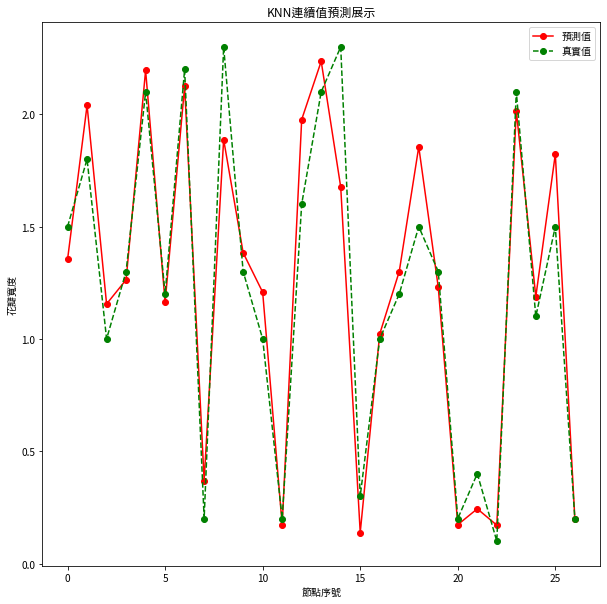

In [12]:
plt.figure(figsize=(10, 10))
# 繪製預測值
plt.plot(result, 'ro-', label='預測值')
# 繪製真實值
plt.plot(test_y.values, 'go--', label='真實值')
plt.title('KNN連續值預測展示')
plt.xlabel('節點序號')
plt.ylabel('花瓣寬度')
plt.legend()
plt.show()